In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/India_Economy_Analytics_Dataset_by chandan goswami.csv")
df.head()

,year,state,gdp_per_capita,literacy_rate,female_literacy_rate,poverty_rate,unemployment_rate,internet_penetration,urban_population_pct,life_expectancy
0,2011,Andhra Pradesh,240385,NaN,89.950131,NaN,9.309082,31.431614,68.980663,71.777263
1,2012,Andhra Pradesh,223345,97.690704,60.245726,31.942756,9.720904,47.082310,47.236635,75.289484
2,2013,Andhra Pradesh,111225,76.896740,71.940358,26.960099,9.241288,42.786799,43.424238,73.341392
3,2014,Andhra Pradesh,257312,74.307271,93.248441,19.341437,8.262790,18.678242,52.837925,68.888016
4,2015,Andhra Pradesh,151387,72.002474,77.159622,7.716484,5.115394,15.557005,65.438988,71.522344


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  156 non-null    int64  
 1   state                 156 non-null    object 
 2   gdp_per_capita        156 non-null    int64  
 3   literacy_rate         145 non-null    float64
 4   female_literacy_rate  145 non-null    float64
 5   poverty_rate          145 non-null    float64
 6   unemployment_rate     145 non-null    float64
 7   internet_penetration  145 non-null    float64
 8   urban_population_pct  145 non-null    float64
 9   life_expectancy       145 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 12.3+ KB


In [ ]:
df.isnull().sum()

,0
year,0
state,0
gdp_per_capita,0
literacy_rate,11
female_literacy_rate,11
poverty_rate,11
unemployment_rate,11
internet_penetration,11
urban_population_pct,11
life_expectancy,11


In [ ]:
df['literacy_rate']=df['literacy_rate'].fillna(df['literacy_rate'].mean())
df['female_literacy_rate']=df['female_literacy_rate'].fillna(df['female_literacy_rate'].mean())
df['poverty_rate']=df['poverty_rate'].fillna(df['poverty_rate'].mean())
df['unemployment_rate']=df['unemployment_rate'].fillna(df['unemployment_rate'].mean())
df['internet_penetration']=df['internet_penetration'].fillna(df['internet_penetration'].mean())
df['life_expectancy']=df['life_expectancy'].fillna(df['life_expectancy'].mean())
df['urban_population_pct']=df["urban_population_pct"].fillna(df['urban_population_pct'].mean())


In [ ]:
df.isnull().sum()

,0
year,0
state,0
gdp_per_capita,0
literacy_rate,0
female_literacy_rate,0
poverty_rate,0
unemployment_rate,0
internet_penetration,0
urban_population_pct,0
life_expectancy,0


In [ ]:
df.describe()

,year,gdp_per_capita,literacy_rate,female_literacy_rate,poverty_rate,unemployment_rate,internet_penetration,urban_population_pct,life_expectancy
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,2017.000000,170127.333333,81.672103,80.079870,22.580989,7.810043,56.407311,47.130923,70.632823
std,3.753708,52419.764963,9.802218,9.986525,10.281203,2.397816,23.036105,13.085114,2.798775
min,2011.000000,82124.000000,65.083685,60.245726,5.107239,3.090349,15.189320,25.305713,66.045785
25%,2014.000000,121618.000000,73.973518,71.914166,13.963448,5.921273,36.707520,36.007704,68.306213
50%,2017.000000,169219.500000,81.672103,80.172596,22.580989,7.810043,56.407311,47.130923,70.623749
75%,2020.000000,209075.750000,90.352103,88.748516,31.952009,9.829970,74.514286,58.736816,72.969762
max,2023.000000,259799.000000,97.914780,95.976182,39.755381,11.992106,98.976402,69.791420,75.860309


In [ ]:
df.columns

Index(['year', 'state', 'gdp_per_capita', 'literacy_rate',
       'female_literacy_rate', 'poverty_rate', 'unemployment_rate',
       'internet_penetration', 'urban_population_pct', 'life_expectancy'],
      dtype='object')

In [ ]:
df['year'].unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023])

In [ ]:
df['state'].unique()

array(['Andhra Pradesh', 'Bihar', 'Delhi', 'Gujarat', 'Karnataka',
       'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Rajasthan',
       'Tamil Nadu', 'Uttar Pradesh', 'West Bengal'], dtype=object)

In [ ]:
x=df.groupby(['year','state'],as_index=False)['gdp_per_capita'].mean()
x.head()

,year,state,gdp_per_capita
0,2011,Andhra Pradesh,240385.0
1,2011,Bihar,244257.0
2,2011,Delhi,146584.0
3,2011,Gujarat,247700.0
4,2011,Karnataka,149781.0


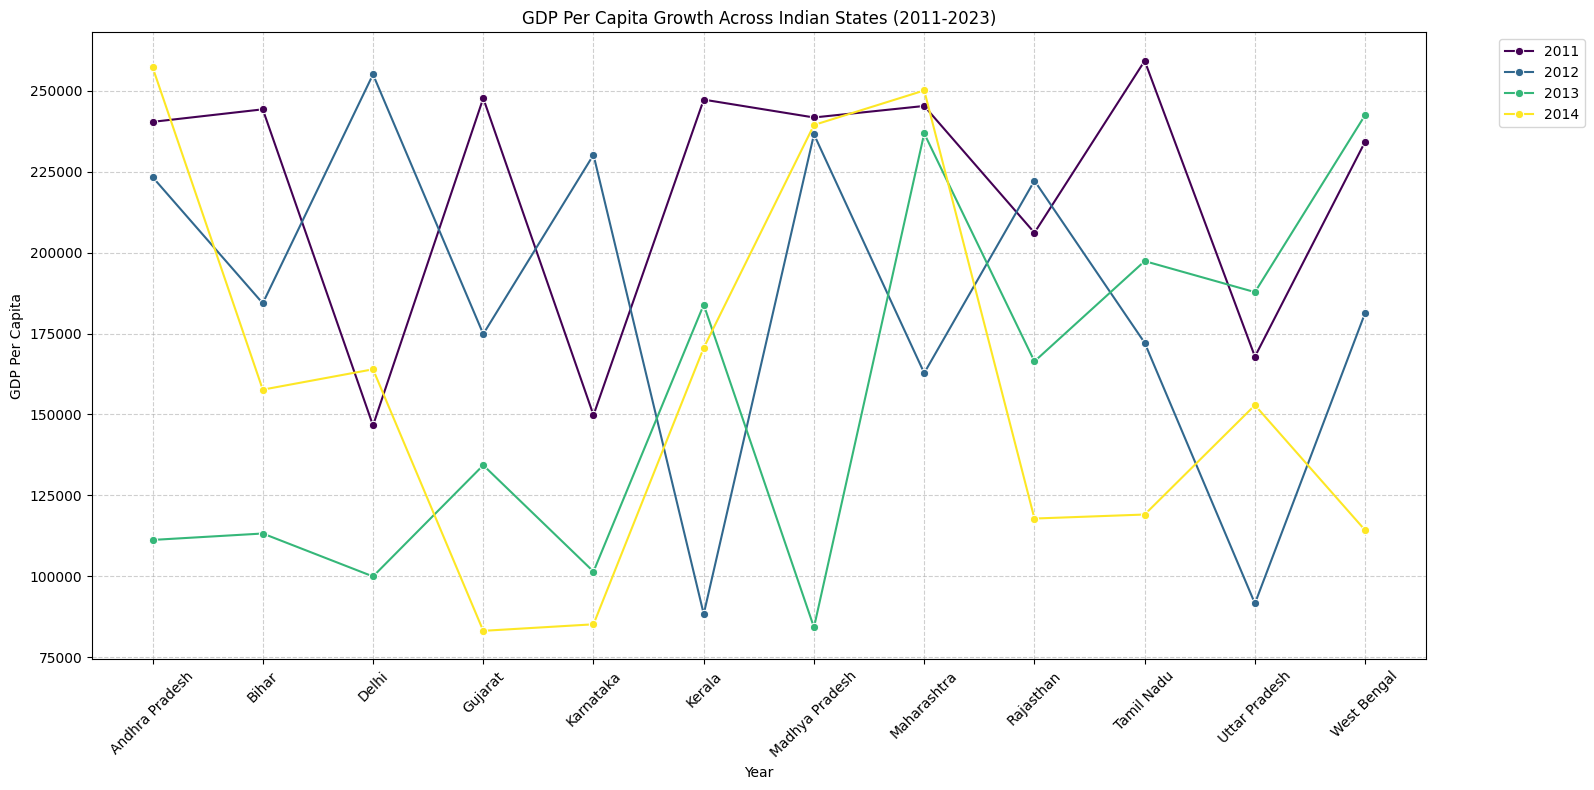

In [ ]:
plt.figure(figsize=(16, 8))
sns.lineplot(data=x, x='state', y='gdp_per_capita', hue='year', marker='o',palette='viridis')
plt.title('GDP Per Capita Growth Across Indian States (2011-2023)')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
y=df.groupby(['year','state'],as_index=False)['gdp_per_capita'].mean()
y=y[y['year'].isin([2015,2016,2017,2018,2019])]
y.head()

,year,state,gdp_per_capita
48,2015,Andhra Pradesh,151387.0
49,2015,Bihar,230346.0
50,2015,Delhi,87759.0
51,2015,Gujarat,173936.0
52,2015,Karnataka,133499.0


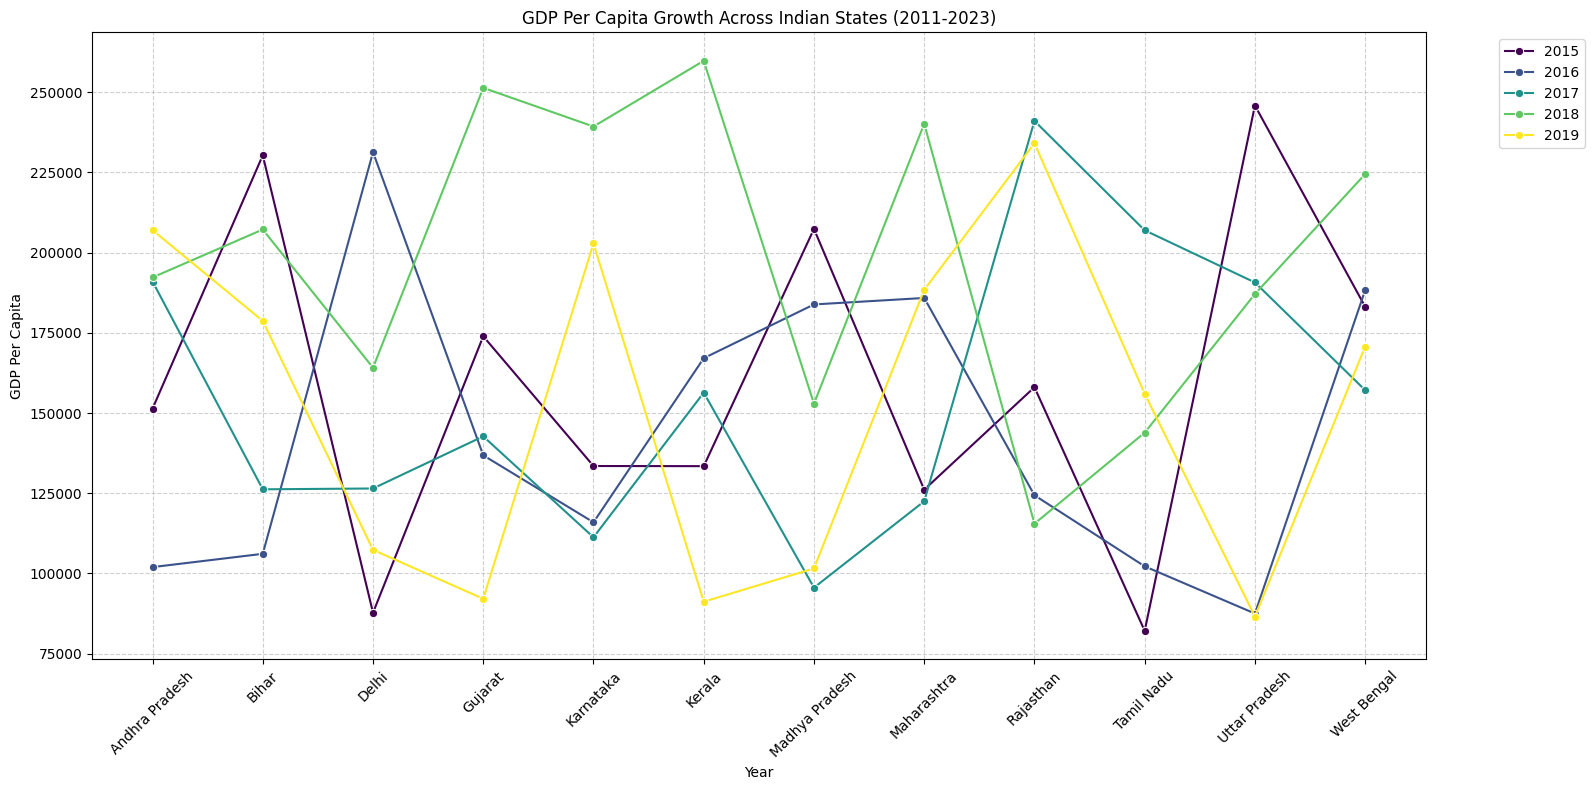

In [ ]:
plt.figure(figsize=(16, 8))
sns.lineplot(data=y, x='state', y='gdp_per_capita', hue='year', marker='o',palette='viridis')
plt.title('GDP Per Capita Growth Across Indian States (2011-2023)')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
z=df.groupby(['year','state'],as_index=False)['gdp_per_capita'].mean()
z=z[z['year'].isin([2020,2021,2022,2023])]
z.head()

,year,state,gdp_per_capita
108,2020,Andhra Pradesh,236589.0
109,2020,Bihar,249600.0
110,2020,Delhi,220421.0
111,2020,Gujarat,190920.0
112,2020,Karnataka,114788.0


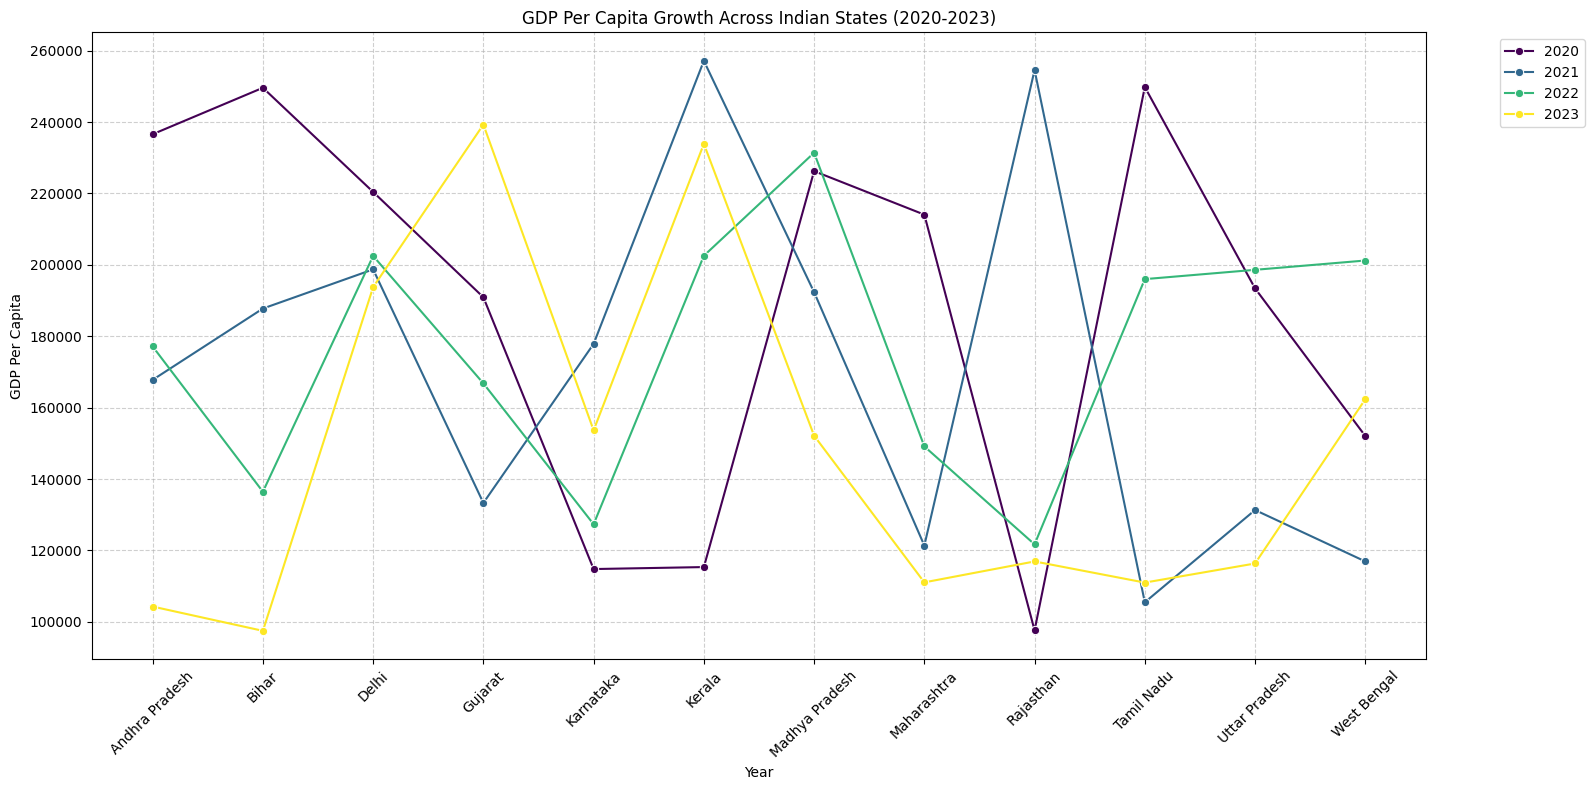

In [ ]:
plt.figure(figsize=(16, 8))
sns.lineplot(data=z, x='state', y='gdp_per_capita', hue='year', marker='o',palette='viridis')
plt.title('GDP Per Capita Growth Across Indian States (2020-2023)')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
x['gdp_growth_rate'] = x.groupby('state')['gdp_per_capita'].pct_change() * 100
avg_growth_rate = x.groupby('state')['gdp_growth_rate'].mean().sort_values(ascending=False)
display(avg_growth_rate.head())
print("\nBottom Performing States (Average GDP Growth Rate):")
display(avg_growth_rate.tail())

Top Performing States (Average GDP Growth Rate):


,gdp_growth_rate
state,
Delhi,19.770221
Uttar Pradesh,16.738387
Kerala,14.884739
Madhya Pradesh,13.766341
Gujarat,13.327124



Bottom Performing States (Average GDP Growth Rate):


,gdp_growth_rate
state,
Tamil Nadu,5.003294
Andhra Pradesh,3.793804
West Bengal,3.541146
Maharashtra,1.943442
Bihar,-0.277905


/tmp/ipython-input-649968621.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette='viridis')


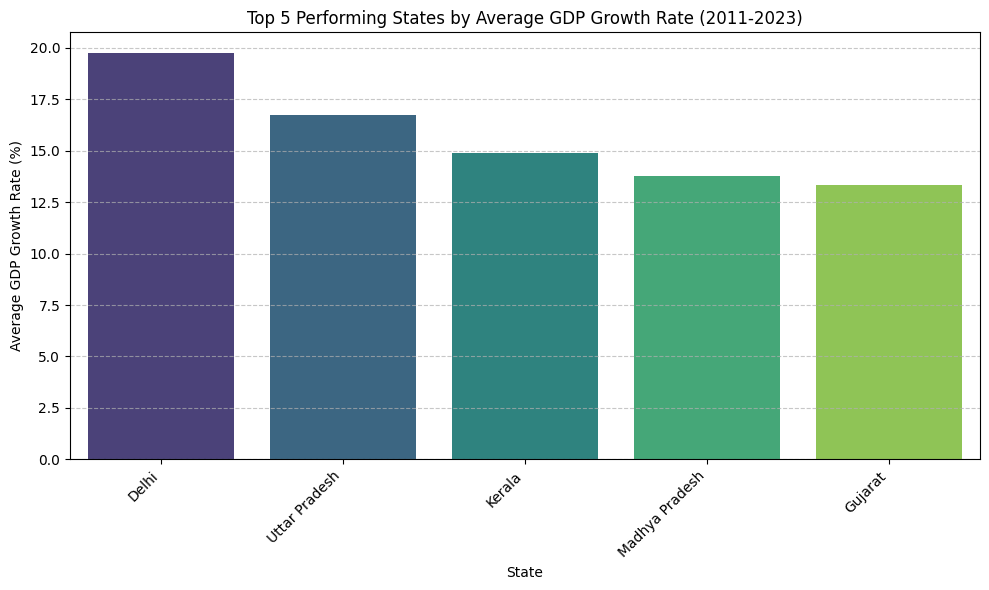

In [ ]:

top_states = avg_growth_rate.head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_states.index, y=top_states.values, palette='viridis')
plt.title('Top 5 Performing States by Average GDP Growth Rate (2011-2023)')
plt.xlabel('State')
plt.ylabel('Average GDP Growth Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1195290028.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_states.index, y=bottom_states.values, palette='plasma')


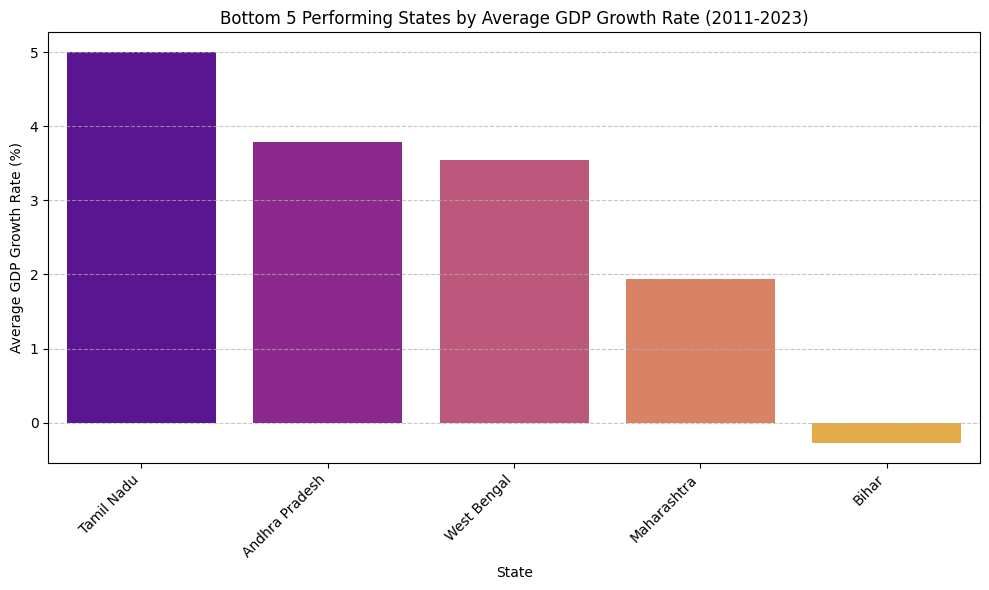

In [ ]:
bottom_states = avg_growth_rate.tail(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=bottom_states.index, y=bottom_states.values, palette='plasma')
plt.title('Bottom 5 Performing States by Average GDP Growth Rate (2011-2023)')
plt.xlabel('State')
plt.ylabel('Average GDP Growth Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
df.corr(numeric_only=True)

,year,gdp_per_capita,literacy_rate,female_literacy_rate,poverty_rate,unemployment_rate,internet_penetration,urban_population_pct,life_expectancy
year,1.000000,-0.109662,-0.044122,0.017985,0.060416,-0.006507,-0.009583,-0.027002,-0.036856
gdp_per_capita,-0.109662,1.000000,-0.055364,0.009443,-0.041274,0.088067,0.069698,0.032512,-0.102602
literacy_rate,-0.044122,-0.055364,1.000000,-0.067808,-0.003339,0.043574,0.118894,-0.058984,-0.008215
female_literacy_rate,0.017985,0.009443,-0.067808,1.000000,-0.016138,0.099841,-0.145827,0.169729,0.028570
poverty_rate,0.060416,-0.041274,-0.003339,-0.016138,1.000000,0.023870,0.113849,-0.101435,-0.085930
unemployment_rate,-0.006507,0.088067,0.043574,0.099841,0.023870,1.000000,-0.072911,0.004997,0.186894
internet_penetration,-0.009583,0.069698,0.118894,-0.145827,0.113849,-0.072911,1.000000,-0.006408,-0.119807
urban_population_pct,-0.027002,0.032512,-0.058984,0.169729,-0.101435,0.004997,-0.006408,1.000000,0.057416
life_expectancy,-0.036856,-0.102602,-0.008215,0.028570,-0.085930,0.186894,-0.119807,0.057416,1.000000


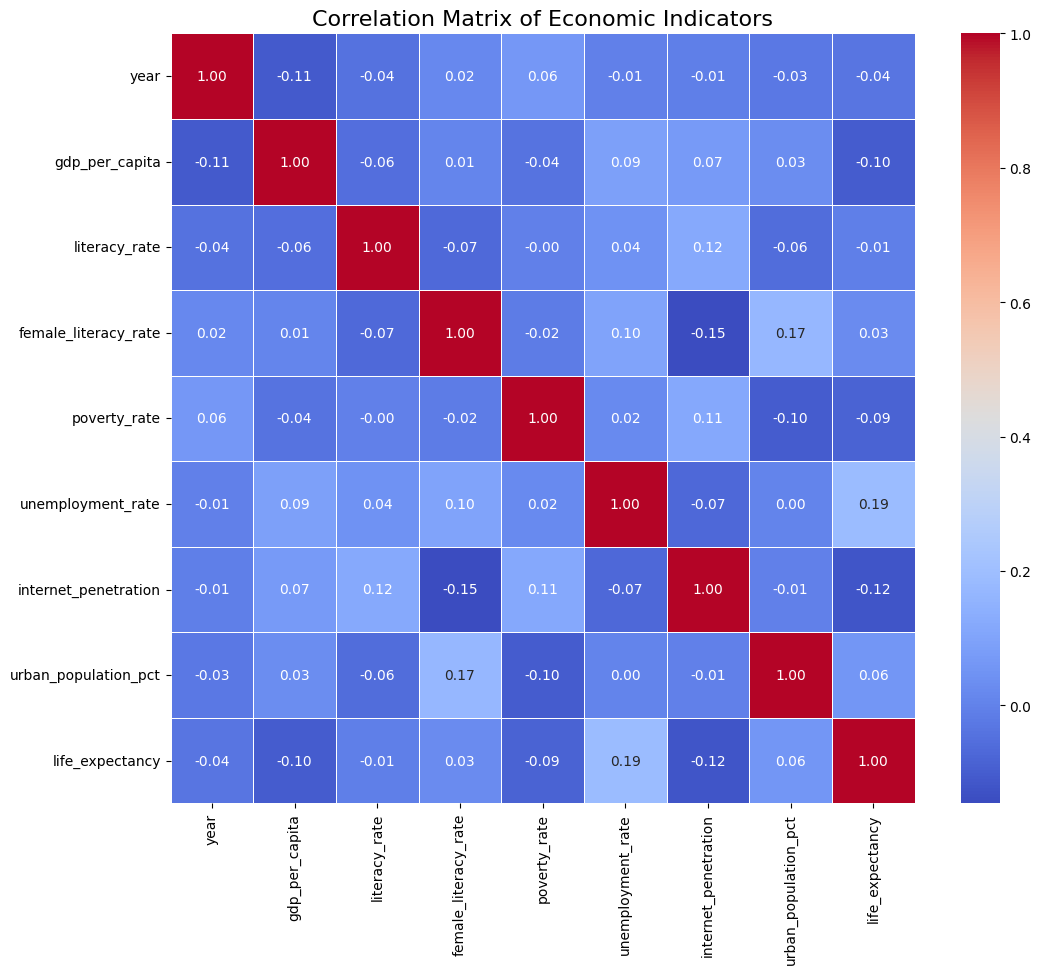

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 10})
plt.title('Correlation Matrix of Economic Indicators', fontsize=16)
plt.show()

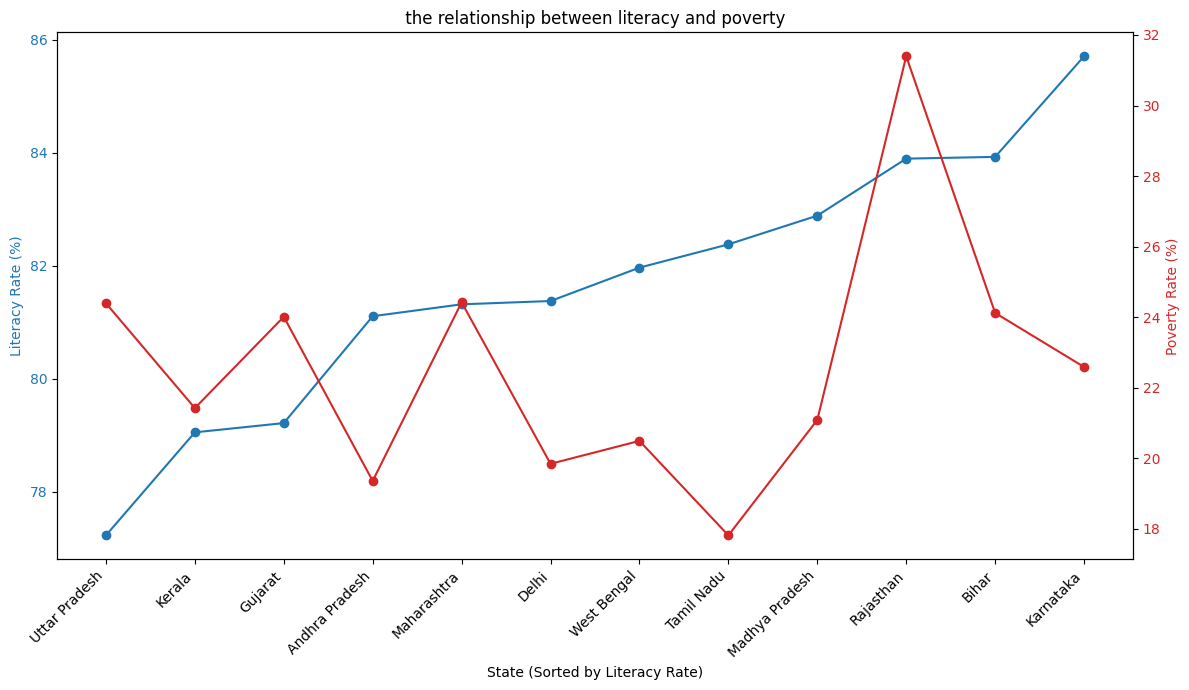

In [ ]:
state_avg_data = df.groupby('state')[['literacy_rate', 'poverty_rate']].mean().reset_index()
state_avg_data_sorted = state_avg_data.sort_values(by='literacy_rate')


fig, ax1 = plt.subplots(figsize=(12, 7))

color = 'tab:blue'
ax1.set_xlabel('State (Sorted by Literacy Rate)')
ax1.set_ylabel('Literacy Rate (%)', color=color)
ax1.plot(state_avg_data_sorted['state'], state_avg_data_sorted['literacy_rate'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(range(len(state_avg_data_sorted['state'])))
ax1.set_xticklabels(state_avg_data_sorted['state'], rotation=45, ha='right')

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('Poverty Rate (%)', color=color)
ax2.plot(state_avg_data_sorted['state'], state_avg_data_sorted['poverty_rate'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title(' the relationship between literacy and poverty ')
fig.tight_layout()
plt.show()

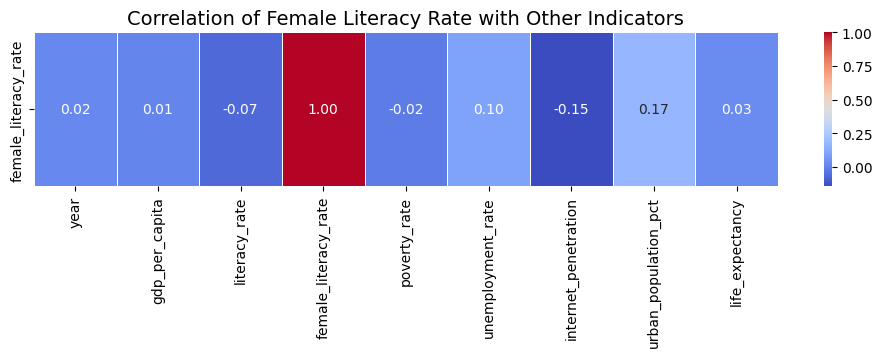

In [ ]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 2))
sns.heatmap(correlation_matrix[['female_literacy_rate']].T, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 10})
plt.title('Correlation of Female Literacy Rate with Other Indicators', fontsize=14)
plt.show()

In [ ]:
un=df.groupby(['year','state'],as_index=False)['unemployment_rate'].mean()
un

,year,state,unemployment_rate
0,2011,Andhra Pradesh,9.309082
1,2011,Bihar,7.739277
2,2011,Delhi,9.851598
3,2011,Gujarat,10.488508
4,2011,Karnataka,4.457700
...,...,...,...
151,2023,Maharashtra,11.456763
152,2023,Rajasthan,4.079696
153,2023,Tamil Nadu,9.015783
154,2023,Uttar Pradesh,10.287869


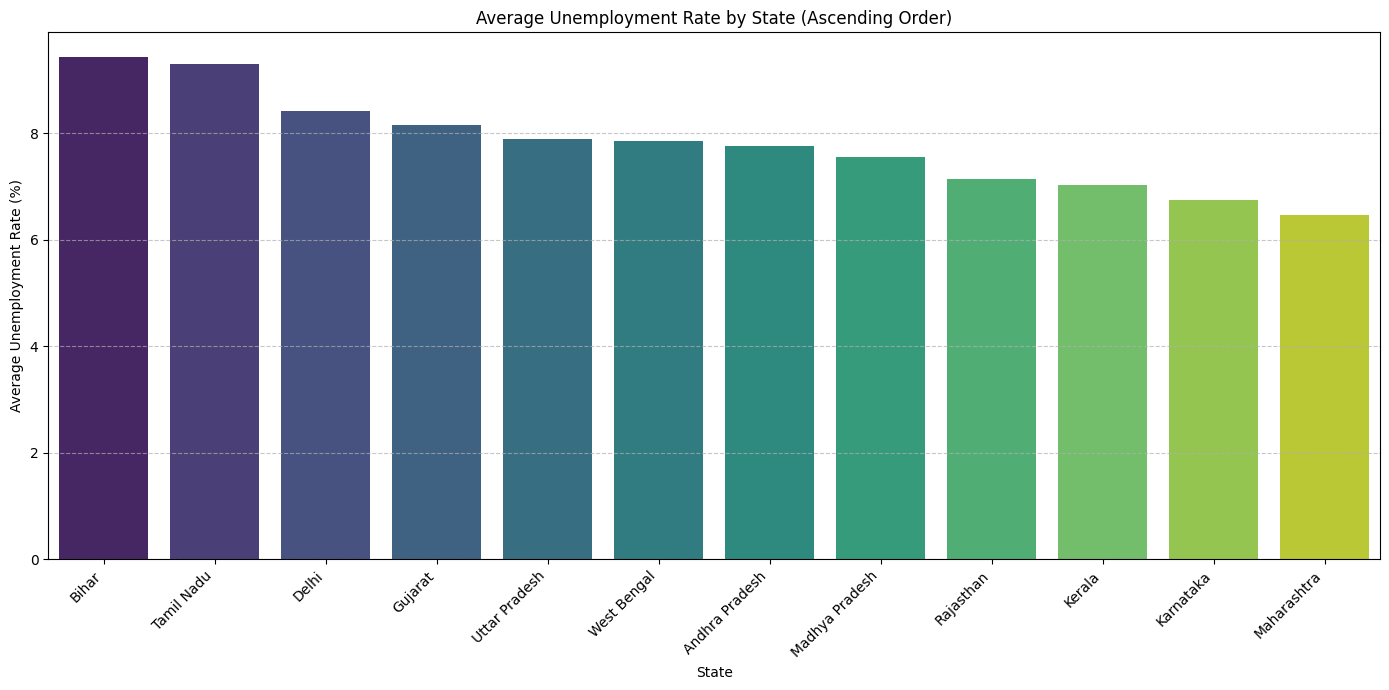

In [ ]:
plt.figure(figsize=(14, 7))
average_unemployment_by_state = df.groupby('state')['unemployment_rate'].mean()
sorted_unemployment_rates = average_unemployment_by_state.sort_values(ascending=False)
sns.barplot(x=sorted_unemployment_rates.index, y=sorted_unemployment_rates.values, hue=sorted_unemployment_rates.index, palette='viridis', legend=False)
plt.title('Average Unemployment Rate by State (Ascending Order)')
plt.xlabel('State')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

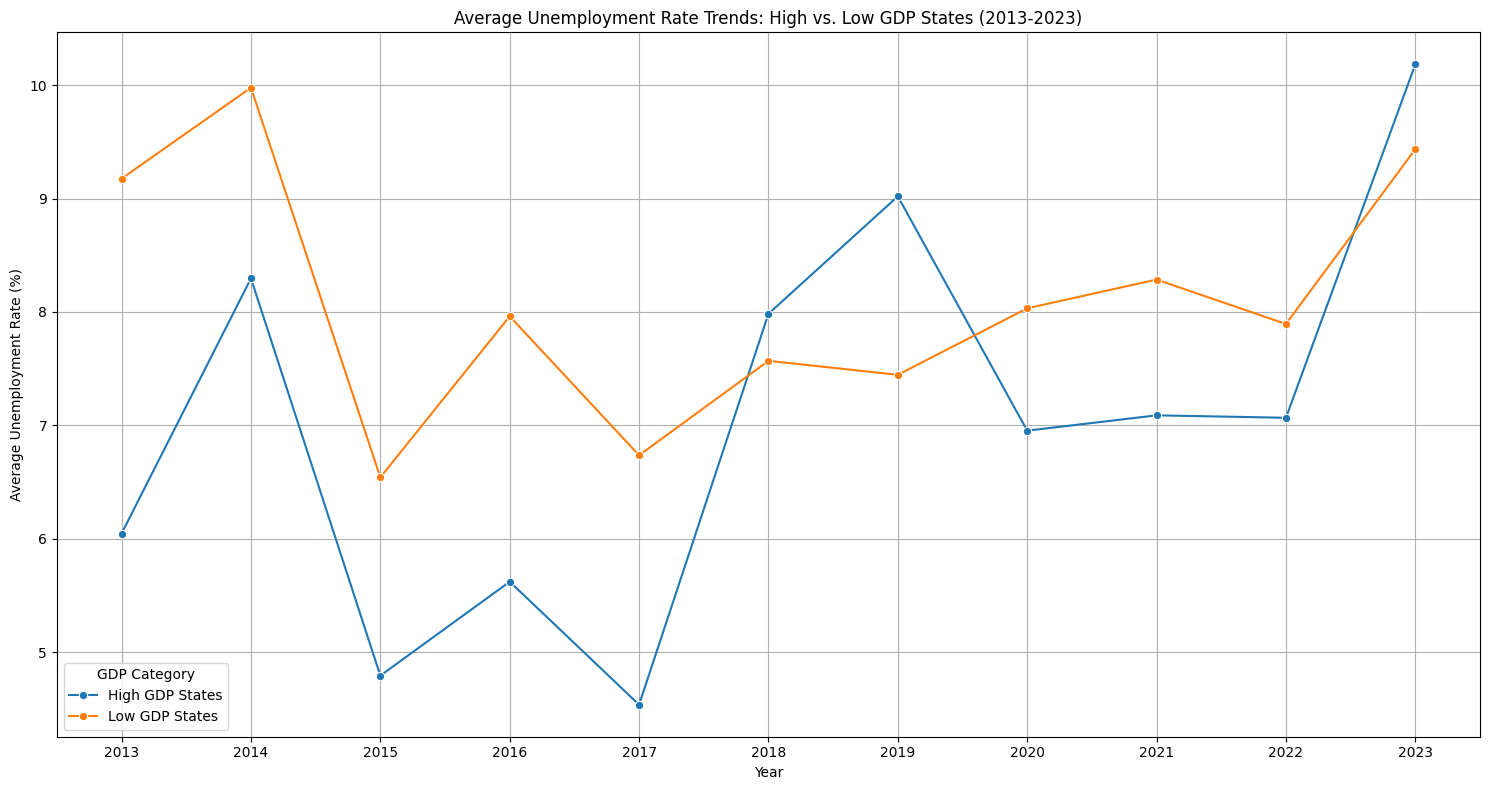

In [ ]:
average_gdp_per_capita_by_state = df.groupby('state')['gdp_per_capita'].mean().sort_values(ascending=False).reset_index()

high_gdp_states = average_gdp_per_capita_by_state.head(3)['state']
low_gdp_states = average_gdp_per_capita_by_state.tail(3)['state']

high_gdp_states_data = df[(df['state'].isin(high_gdp_states)) & (df['year'] >= 2013) & (df['year'] <= 2023)]
low_gdp_states_data = df[(df['state'].isin(low_gdp_states)) & (df['year'] >= 2013) & (df['year'] <= 2023)]

avg_unemployment_high_gdp_yearly = high_gdp_states_data.groupby('year')['unemployment_rate'].mean().reset_index()
avg_unemployment_high_gdp_yearly['Category'] = 'High GDP States'
avg_unemployment_low_gdp_yearly = low_gdp_states_data.groupby('year')['unemployment_rate'].mean().reset_index()
avg_unemployment_low_gdp_yearly['Category'] = 'Low GDP States'

comparison_trends_df = pd.concat([
    avg_unemployment_high_gdp_yearly,
    avg_unemployment_low_gdp_yearly])

plt.figure(figsize=(15, 8))
sns.lineplot(data=comparison_trends_df, x='year', y='unemployment_rate', hue='Category', marker='o')
plt.title('Average Unemployment Rate Trends: High vs. Low GDP States (2013-2023)')
plt.xlabel('Year')
plt.ylabel('Average Unemployment Rate (%)')
plt.grid(True)
plt.xticks(sorted(comparison_trends_df['year'].unique()))
plt.legend(title='GDP Category')
plt.tight_layout()
plt.show()

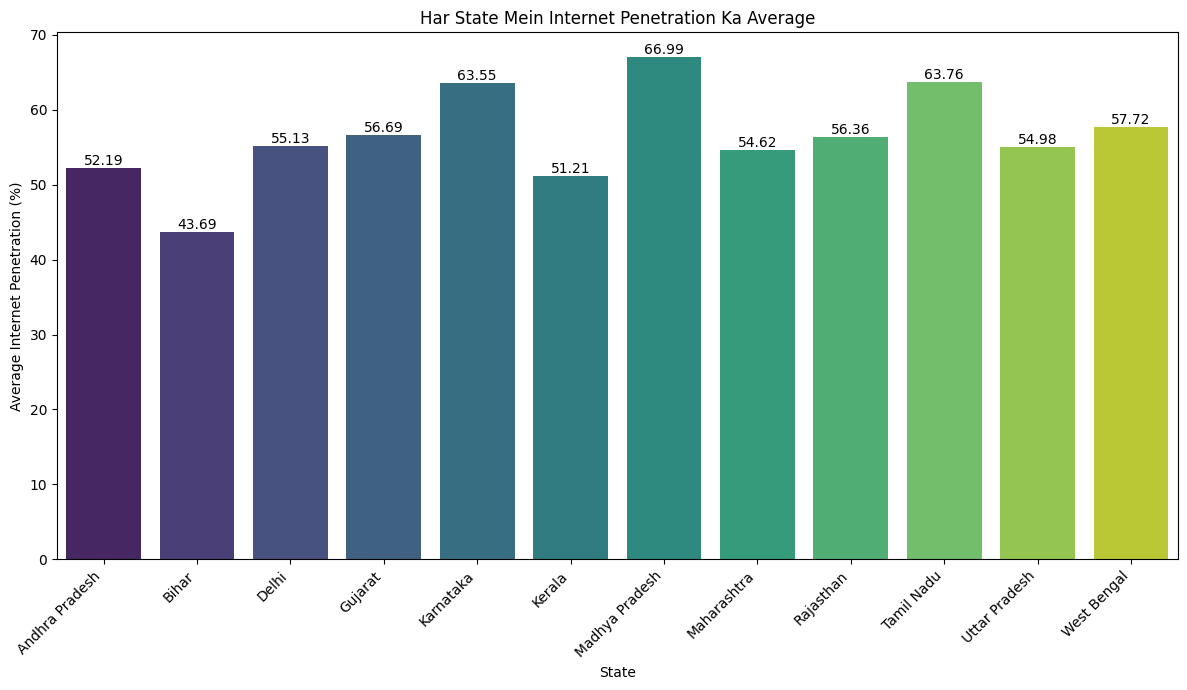

In [ ]:
avg_internet_penetration_state = df.groupby('state')['internet_penetration'].mean().reset_index()
plt.figure(figsize=(12, 7))
ax = sns.barplot(x='state', y='internet_penetration', data=avg_internet_penetration_state, hue='state', palette='viridis', legend=False)
plt.title('Har State Mein Internet Penetration Ka Average')
plt.xlabel('State')
plt.ylabel('Average Internet Penetration (%)')
plt.xticks(rotation=45, ha='right')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.tight_layout()
plt.show()

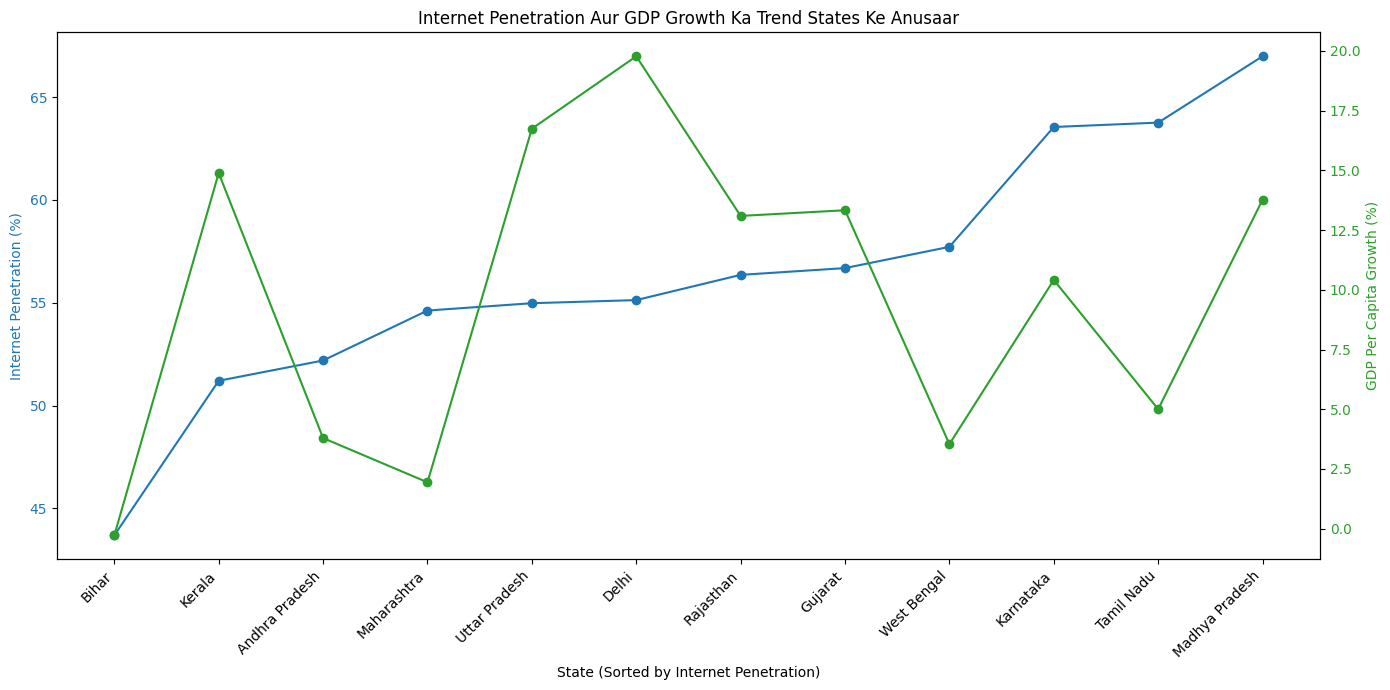

In [ ]:
df['gdp_per_capita_growth'] = df.groupby('state')['gdp_per_capita'].pct_change() * 100

state_internet_gdp_data = df.groupby('state')[['internet_penetration', 'gdp_per_capita_growth']].mean().reset_index()
state_internet_gdp_data_sorted = state_internet_gdp_data.sort_values(by='internet_penetration')

fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:blue'
ax1.set_xlabel('State (Sorted by Internet Penetration)')
ax1.set_ylabel('Internet Penetration (%)', color=color)
ax1.plot(state_internet_gdp_data_sorted['state'], state_internet_gdp_data_sorted['internet_penetration'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(range(len(state_internet_gdp_data_sorted['state'])))
ax1.set_xticklabels(state_internet_gdp_data_sorted['state'], rotation=45, ha='right')

ax2 = ax1.twinx()

color = 'tab:green'
ax2.set_ylabel('GDP Per Capita Growth (%)', color=color)
ax2.plot(state_internet_gdp_data_sorted['state'], state_internet_gdp_data_sorted['gdp_per_capita_growth'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Internet Penetration Aur GDP Growth Ka Trend States Ke Anusaar')
fig.tight_layout()
plt.show()

/tmp/ipython-input-3373018882.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_data = df.groupby('urban_population_bins')[['unemployment_rate', 'gdp_per_capita']].mean().reset_index()


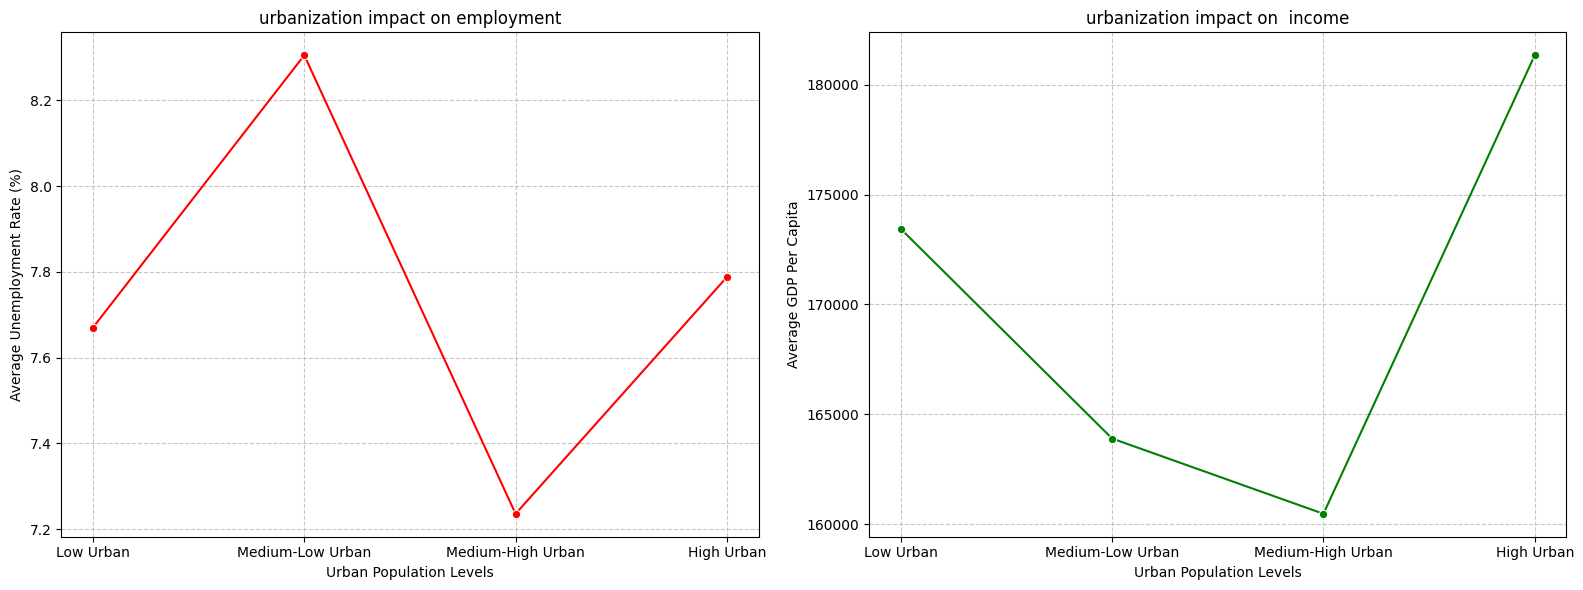

In [ ]:
df['urban_population_bins'] = pd.cut(df['urban_population_pct'], bins=4, labels=['Low Urban', 'Medium-Low Urban', 'Medium-High Urban', 'High Urban'])


binned_data = df.groupby('urban_population_bins')[['unemployment_rate', 'gdp_per_capita']].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))


sns.lineplot(x='urban_population_bins', y='unemployment_rate', data=binned_data, ax=axes[0], marker='o', color='red')
axes[0].set_title('urbanization impact on employment')
axes[0].set_xlabel('Urban Population Levels')
axes[0].set_ylabel('Average Unemployment Rate (%)')
axes[0].grid(True, linestyle='--', alpha=0.7)

sns.lineplot(x='urban_population_bins', y='gdp_per_capita', data=binned_data, ax=axes[1], marker='o', color='green')
axes[1].set_title('urbanization impact on  income')
axes[1].set_xlabel('Urban Population Levels')
axes[1].set_ylabel('Average GDP Per Capita')
axes[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()